# Modelo ARMA(p,q) (AutoRegressive Moving Average: AR(p) + MA(q))

## Introdução

Matematicamente, um modelo ARMA(p,q) é uma combinação linear de um modelo AR(p) e um modelo MA(q). Em outras palavras, um modelo ARMA(p,q) é uma generalização de modelos AR(p) e MA(q). Este modelo é definido pela equação:

$$ y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \ldots + \phi_p y_{t-p} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q} + \varepsilon_t $$

onde:

- $y_t$ é a série temporal no tempo $t$;
- $c$ é uma constante;
- $\phi_1, \ldots, \phi_p$ são os parâmetros do modelo AR(p);
- $\theta_1, \ldots, \theta_q$ são os parâmetros do modelo MA(q);
- $\varepsilon_t$ é o erro no tempo $t$.

Podemos identificar o modelo ARMA(p,q) via seguite procedimento:

![Identificação do modelo ARMA(p,q)](../figures/arma.png)

Se ambos os plots ACF e PACF mostra um decai exponencial ou sinusoidal, então o modelo ARMA(p,q) é apropriado. Infelizmente, a identificação do modelo ARMA(p,q) é mais complicada do que a identificação dos modelos AR(p) e MA(q) e ACF e PACF podem não ser suficientes para encontrar os valores de $p$ e $q$. Neste caso temos que seguir um procedimento mais geral ilustrado na figura abaixo.

![Identificação do modelo ARMA(p,q)](../figures/arma_procedure.png)

Como é possivel ver na figura acima, o procedimento para identificar o modelo ARMA(p,q) é o seguinte:
- verificar se a série temporal é estacionária;
- se a série temporal não é estacionária, aplicar diferenciação para torná-la estacionária;
- treinar um modelo ARMA(p,q) com diferentes valores de $p$ e $q$;
- avaliar a qualidade do modelo ARMA(p,q) com base em métricas como AIC, BIC, RMSE, etc.
- selecionar o modelo ARMA(p,q) com a melhor métrica, de preferência o modelo com o menor AIC ou BIC.
- verificar se os resíduos do modelo ARMA(p,q) são brancos usando o teste de Ljung-Box e Q-Q plot.





## AIC e BIC

O AIC (Akaike Information Criterion) e o BIC (Bayesian Information Criterion) são métricas usadas para avaliar a qualidade de um modelo estatístico. O AIC é definido pela equação:

$$ AIC = 2k - 2 \ln(L) $$

onde:
- $k$ é o número de parâmetros do modelo;
- $L$ é a função de verossimilhança (`likelihood`) do modelo.

O BIC é definido pela equação:

$$ BIC = k \ln(n) - 2 \ln(L) $$

onde:

- $n$ é o número de observações.

O AIC e o BIC são usados para comparar modelos estatísticos. O modelo com o menor AIC ou BIC é considerado o melhor modelo. O AIC e o BIC penalizam modelos com muitos parâmetros. Em outras palavras, o AIC e o BIC favorecem modelos mais simples.

Mas o que é a função de verossimilhança $L$? A função de verossimilhança é uma medida da probabilidade de observar os dados sob um determinado modelo estatístico. A função de verossimilhança é definida pela equação:

$$ L = \prod_{i=1}^{n} f(y_i | \theta) $$

onde:
- $f(y_i | \theta)$ é a função de densidade de probabilidade dos dados;
- $\theta$ é o vetor de parâmetros do modelo.

Em uma linguagem mais simples, a função de verossimilhança é a probabilidade de observar os dados sob um determinado modelo estatístico. Ou seja, verossimilhança é oposto de probabilidade. A probabilidade é a chance de um evento ocorrer, enquanto a verossimilhança é a chance de um modelo gerar os dados observados.



## Teste de Ljung-Box

O teste de Ljung-Box é um teste de hipótese utilizado para verificar se os resíduos de um modelo ARMA(p,q) são *white noise*, ou seja, se são independentes e identicamente distribuídos (i.i.d.). Esse teste é importante para avaliar a adequação de modelos de séries temporais, como ARMA, ao examinar se os resíduos possuem correlação significativa em lags sucessivos. Se os resíduos forem *white noise*, isso indica que o modelo capturou bem a estrutura de dependência dos dados.

### Hipóteses do Teste

- **Hipótese nula (H₀)**: Os resíduos são *white noise* (não possuem autocorrelação significativa em nenhum dos lags).
- **Hipótese alternativa (H₁)**: Os resíduos não são *white noise* (há autocorrelação significativa em um ou mais lags).

### Passos do Teste

No teste de Ljung-Box, é necessário definir dois parâmetros importantes:
1. **Número de defasagens (lags) $k$**: Determina até quantos períodos de defasagem serão examinados para autocorrelação.
2. **Nível de significância $\alpha$**: Define o limiar para rejeitar a hipótese nula. O valor mais comum para $\alpha$ é 5% (0,05).

### Interpretação

- Se o valor-p (p-value) do teste for menor que o nível de significância $\alpha$, rejeitamos a hipótese nula, o que sugere que há autocorrelação nos resíduos e, portanto, o modelo não ajustou adequadamente a série temporal.
- Se o valor-p for maior que $\alpha$, não rejeitamos a hipótese nula, indicando que os resíduos são consistentes com o comportamento de *white noise*.

### Considerações Sazonais

Se os dados forem sazonais, é recomendável ajustar o número de lags de acordo com a periodicidade da série. Por exemplo, se houver sazonalidade mensal em uma série temporal, pode ser interessante testar autocorrelações em lags múltiplos de 12.

## Teste de Dickey-Fuller Aumentado (ADF)

O teste de Dickey-Fuller Aumentado (ADF) é um teste estatístico usado para determinar se uma série temporal é estacionária ou possui uma raiz unitária, o que indica não estacionaridade. Ele é amplamente utilizado na análise de séries temporais para verificar a estacionaridade, uma vez que séries estacionárias são frequentemente necessárias para muitos modelos estatísticos, como o ARIMA.

### Hipóteses do Teste ADF

- **Hipótese nula (H₀)**: A série temporal tem uma raiz unitária (ou seja, não é estacionária).
- **Hipótese alternativa (H₁)**: A série temporal não tem uma raiz unitária (ou seja, é estacionária).

### Estatística do Teste

O teste calcula uma estatística de teste, que é comparada com os valores críticos em diferentes níveis de significância (por exemplo, 1%, 5%, 10%). Se a estatística do teste for menor que o valor crítico, rejeitamos a hipótese nula, sugerindo que a série é estacionária.

### Parâmetros

1. `lags`: Especifica o número de diferenças defasadas a serem incluídas na regressão. Se não for fornecido, a função pode determinar automaticamente uma defasagem apropriada com base no tamanho da amostra, usando critérios como o AIC (Critério de Informação de Akaike) ou o BIC (Critério de Informação Bayesiano).
2. `trend`: Permite que o teste leve em consideração diferentes tipos de tendências nos dados.
   - `'c'`: apenas constante (padrão).
   - `'ct'`: constante e tendência linear.
   - `'ctt'`: constante, tendência linear e quadrática.
   - `'nc'`: sem constante, sem tendência.
3. `autolag`: Especifica como selecionar o número de defasagens.
   - `'AIC'`: Critério de Informação de Akaike (padrão).
   - `'BIC'`: Critério de Informação Bayesiano.
   - `'t-stat'`: baseado no último t-estatístico da defasagem.

### Interpretando os Resultados

- Estatística ADF: A estatística de teste do ADF.
- p-valor: A probabilidade de observar os dados sob a hipótese nula. Um p-valor pequeno (tipicamente menor que 0,05) sugere rejeitar a hipótese nula (ou seja, a série é estacionária).
- Valores críticos: Os limiares para significância nos níveis de 1%, 5% e 10%. Comparar a estatística de teste com esses valores críticos ajuda a determinar se a hipótese nula pode ser rejeitada.
- Número de defasagens usadas: O número de defasagens que o teste utilizou para realizar o teste.

## Q-Q Plot

O Q-Q plot (Quantile-Quantile plot) é um gráfico que compara a distribuição dos resíduos de um modelo estatístico com uma distribuição teórica (normal, exponencial, etc.). O Q-Q plot é uma ferramenta visual para avaliar se os resíduos de um modelo seguem uma distribuição específica. Se os resíduos seguirem a distribuição teórica, os pontos no Q-Q plot devem formar uma linha reta.

## Estacionariedade

O modelo ARMA(p,q) é estacionário se as raízes do polinômio característico $1 - \phi_1 z - \phi_2 z^2 - \ldots - \phi_p z^p = 0$ estão fora do círculo unitário e se as raízes do polinômio característico $1 + \theta_1 z + \theta_2 z^2 + \ldots + \theta_q z^q = 0$ estão fora do círculo unitário.


## Implementação em Python

In [ ]:
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (9,6)

### Simular um processo ARMA(1,1)

In [ ]:
np.random.seed(42)

ar1 = np.array([1, -0.5])
ma1 = np.array([1, 0.5])

ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

### Teste de estacionaridade

In [ ]:
ADF_result = adfuller(ARMA_1_1)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.863883907845347
p-value: 1.4235955093972001e-19


### Plotar ACF 

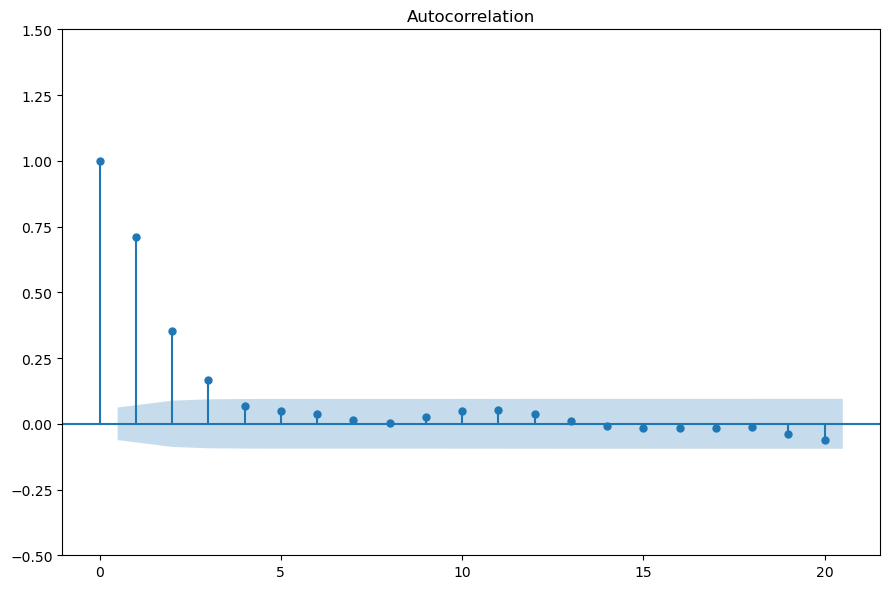

In [ ]:
plot_acf(ARMA_1_1, lags=20);

plt.ylim(-0.5, 1.5)
plt.tight_layout()

### Plotar PACF 

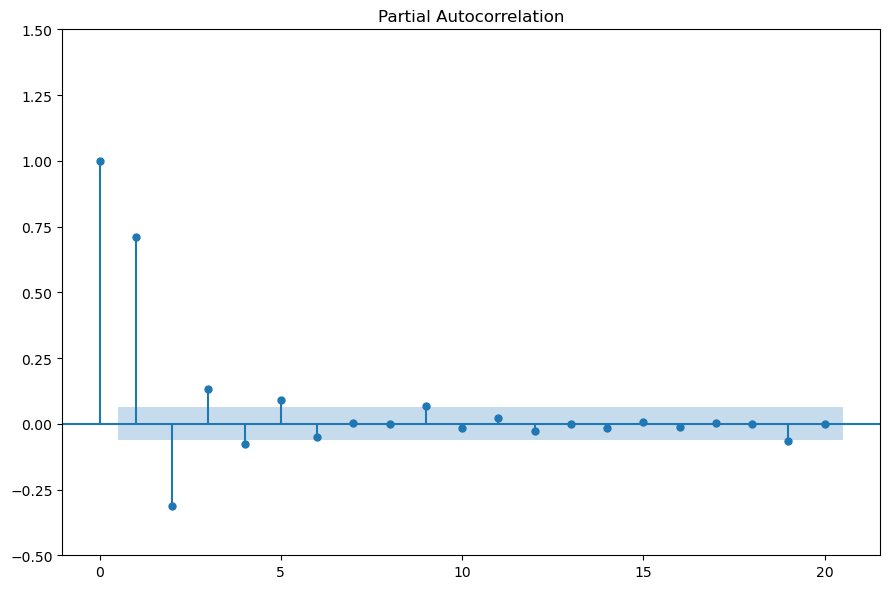

In [ ]:
plot_pacf(ARMA_1_1, lags=20);

plt.ylim(-0.5, 1.5)
plt.tight_layout()

### Aplicando o procedimento geral de modelagem

In [ ]:
def ARMA_gridsearch(endog, min_p, max_p, min_q, max_q):
    
    all_p = range(min_p, max_p+1, 1)
    all_q = range(min_q, max_q+1, 1)
    all_p_q = list(product(all_p, all_q))
    
    print(f'Trying {len(all_p_q)} unique models')
    
    results = []
    
    for each in tqdm_notebook(all_p_q):
        try:
            model = SARIMAX(endog, order=(each[0], 0, each[1])).fit()
        except:
            continnue
            
        results.append([each, model.aic])
        
    order_df = pd.DataFrame(results)
    order_df.columns = ['(p,q)', 'AIC']
    
    order_df = order_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return order_df

In [ ]:
order_df = ARMA_gridsearch(ARMA_1_1, 0, 3, 0, 3)
order_df

Trying 16 unique models


  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)          AIC
0   (1, 1)  2801.952045
1   (3, 1)  2801.964035
2   (1, 3)  2801.971182
3   (2, 1)  2803.047982
4   (3, 3)  2803.143703
5   (1, 2)  2803.363085
6   (0, 3)  2803.428478
7   (3, 2)  2803.835921
8   (2, 3)  2803.852681
9   (2, 2)  2805.842425
10  (3, 0)  2816.244640
11  (2, 0)  2831.590734
12  (0, 2)  2841.903559
13  (1, 0)  2930.516101
14  (0, 1)  2944.919715
15  (0, 0)  3633.476947

### Analise de residos

In [ ]:
model = SARIMAX(ARMA_1_1, order=(1,0,1), simple_differencing=False)
model_fit = model.fit(disp=False)
residuals = model_fit.resid

#### Q-Q plot 

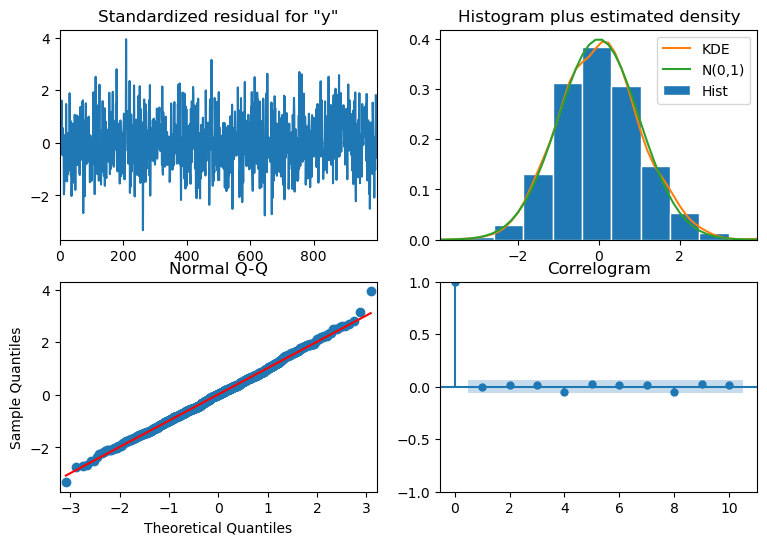

In [ ]:
model_fit.plot_diagnostics();

#### Teste de Ljung-Box 

In [ ]:
def ljung_box_test(residuals, is_seasonal, period=None):
    
    if is_seasonal:
        assert period is not None, 'You must provide a period for the seasonal Ljung-Box test'
        lb_df = acorr_ljungbox(residuals, period=period)
    else:
        max_lag = min([10, len(residuals)/5])
        
        lb_df = acorr_ljungbox(residuals, np.arange(1, max_lag+1, 1))

    fig, ax = plt.subplots()
    ax.plot(lb_df['lb_pvalue'], 'b-', label='p-values')
    ax.hlines(y=0.05, xmin=1, xmax=len(lb_df), color='black')
    plt.tight_layout()
    
    if all(pvalue > 0.05 for pvalue in lb_df['lb_pvalue']):
        print('All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated')
    else:
        print('One p-value is smaller than 0.05')

All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated


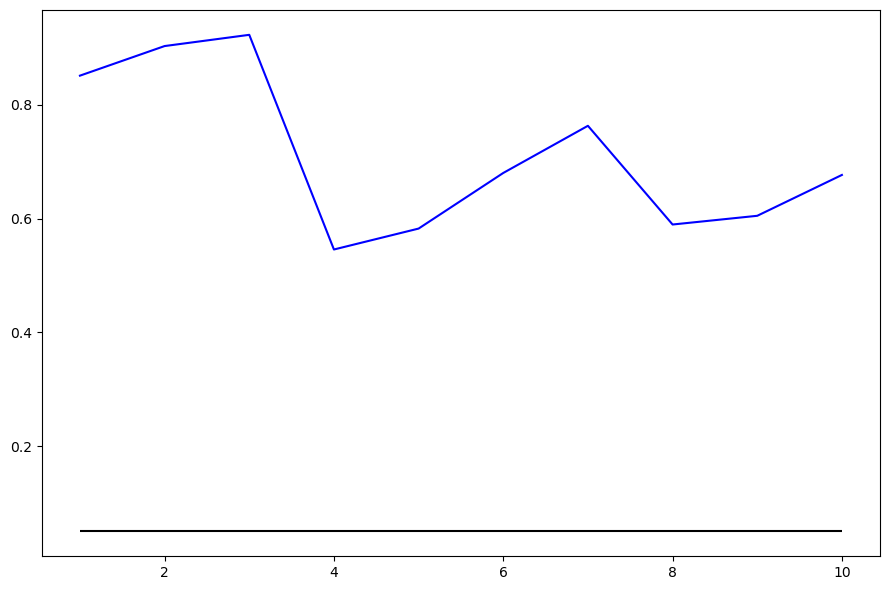

In [ ]:
ljung_box_test(residuals, False, None)

### Forecasting com ARMA(p,q) 

In [ ]:
df = pd.read_csv('../data/simulated_ARMA.csv')
df.head()

value
0  1000.000000
1   999.324822
2   998.505125
3   997.230597
4   995.889162

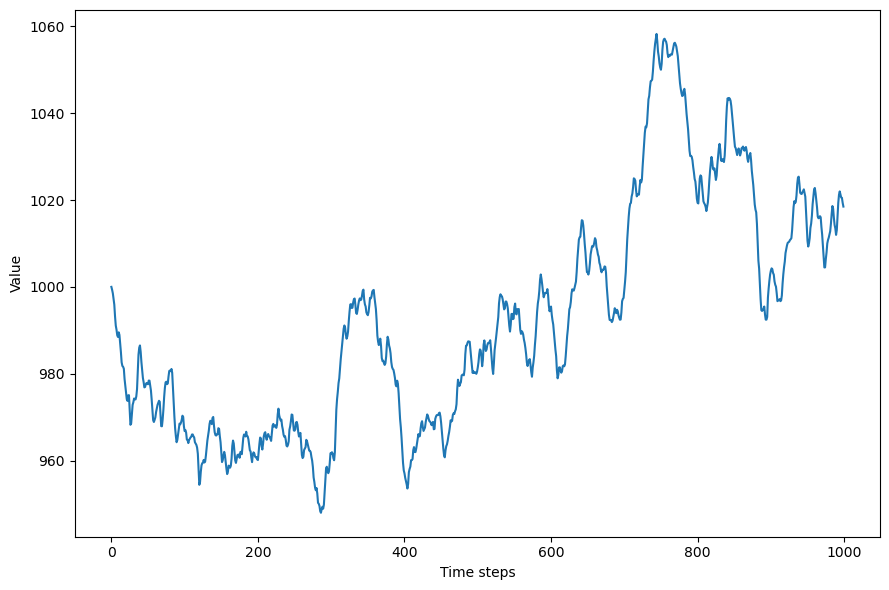

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.set_xlabel('Time steps')
ax.set_ylabel('Value')

plt.tight_layout()

### Procedimento geral para modelagem
#### Estacionaridade

In [ ]:
ADF_result = adfuller(df['value'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.6867520717675288
p-value: 0.43795080886336396


In [ ]:
series_diff = np.diff(df['value'], n=1)

In [ ]:
ADF_result = adfuller(series_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.811194493659922
p-value: 1.9068174576523168e-19


#### Opcional: plotar ACF e PACF 

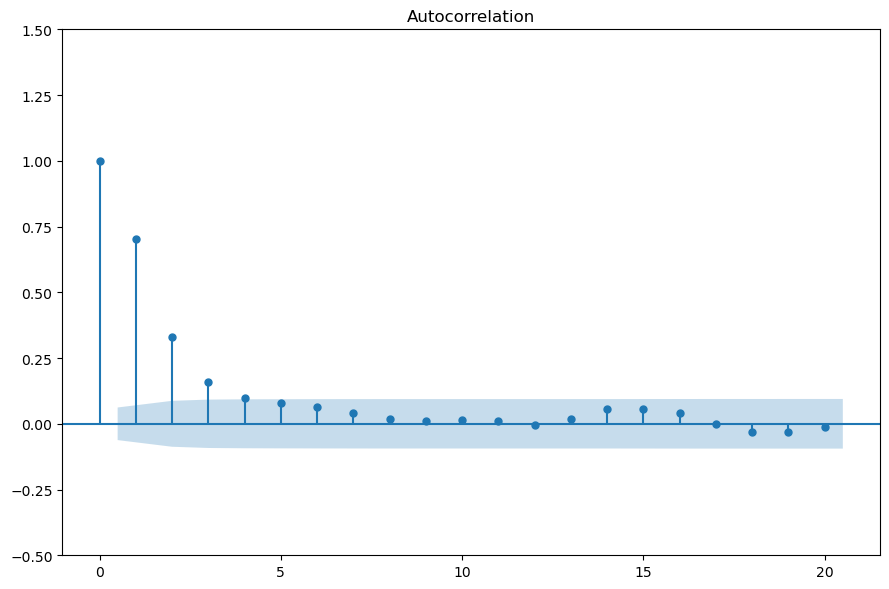

In [ ]:
plot_acf(series_diff, lags=20);

plt.ylim(-0.5, 1.5)
plt.tight_layout()

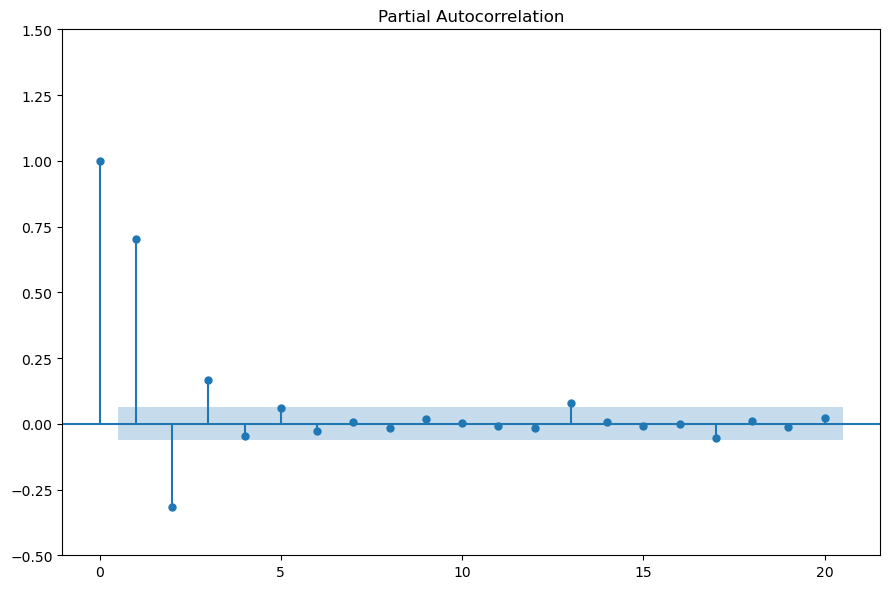

In [ ]:
plot_pacf(series_diff, lags=20);

plt.ylim(-0.5, 1.5)
plt.tight_layout()

#### Train/test split 

In [ ]:
df_diff = pd.DataFrame({'value_diff': series_diff})

train = df_diff[:-100]
test = df_diff[-100:]

print(len(train))
print(len(test))

899
100


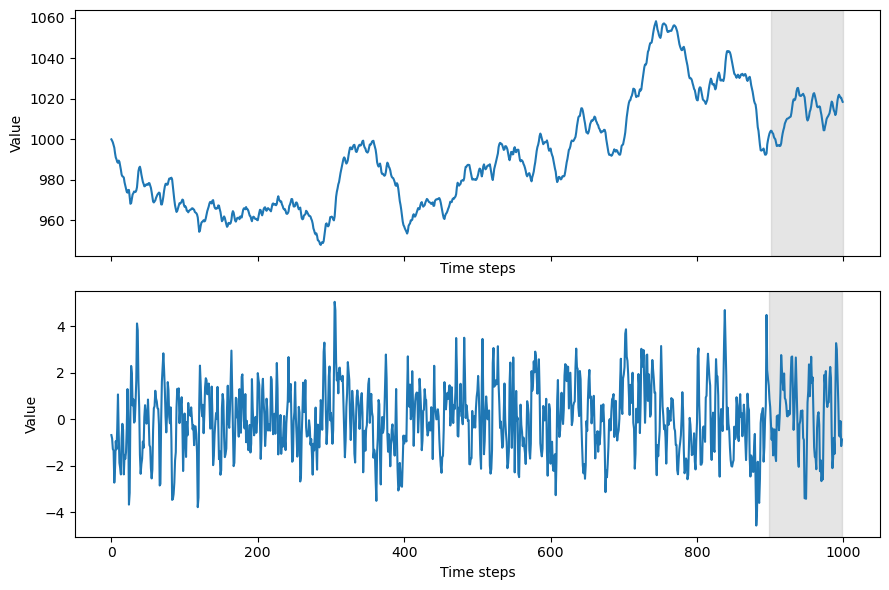

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df['value'])
ax1.set_xlabel('Time steps')
ax1.set_ylabel('Value')
ax1.axvspan(901, 1000, color='#808080', alpha=0.2)

ax2.plot(df_diff['value_diff'])
ax2.set_xlabel('Time steps')
ax2.set_ylabel('Value')
ax2.axvspan(899, 998, color='#808080', alpha=0.2)

plt.tight_layout()

In [ ]:
def ARMA_gridsearch(endog, min_p, max_p, min_q, max_q):
    
    all_p = range(min_p, max_p+1, 1)
    all_q = range(min_q, max_q+1, 1)
    all_p_q = list(product(all_p, all_q))
    
    print(f'Trying {len(all_p_q)} unique models')
    
    results = []
    
    for each in tqdm_notebook(all_p_q):
        try:
            model = SARIMAX(endog, order=(each[0], 0, each[1])).fit()
        except:
            continnue
            
        results.append([each, model.aic])
        
    order_df = pd.DataFrame(results)
    order_df.columns = ['(p,q)', 'AIC']
    
    order_df = order_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return order_df

In [ ]:
order_df = ARMA_gridsearch(train['value_diff'], 0, 3, 0, 3)
order_df.head()

Trying 16 unique models


  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)          AIC
0  (1, 1)  2528.974670
1  (3, 3)  2529.211228
2  (1, 2)  2530.868637
3  (2, 1)  2530.886127
4  (2, 2)  2531.068118

In [ ]:
model = SARIMAX(train['value_diff'], order=(1,0,1))
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             value_diff   No. Observations:                  899
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1261.487
Date:                Thu, 05 Jan 2023   AIC                           2528.975
Time:                        13:23:13   BIC                           2543.379
Sample:                             0   HQIC                          2534.477
                                - 899                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4510      0.039     11.458      0.000       0.374       0.528
ma.L1          0.5389      0.035     15.275      0.000       0.470       0.608
sigma2         0.9679      0.044     21.800      0.0

#### Analise de residuals 

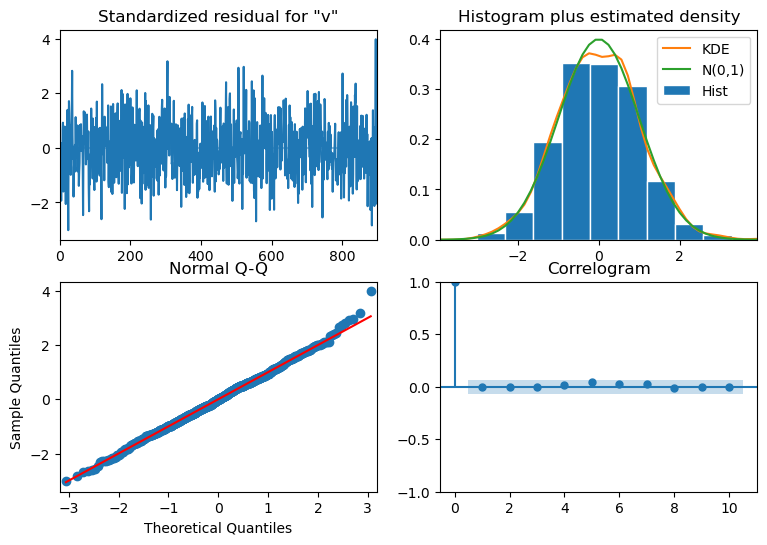

In [ ]:
model_fit.plot_diagnostics();

In [ ]:
def ljung_box_test(residuals, is_seasonal, period):
    
    if is_seasonal:
        lb_df = acorr_ljungbox(residuals, period=period)
    else:
        max_lag = min([10, len(residuals)/5])
        
        lb_df = acorr_ljungbox(residuals, np.arange(1, max_lag+1, 1))

    fig, ax = plt.subplots()
    ax.plot(lb_df['lb_pvalue'], 'b-', label='p-values')
    ax.hlines(y=0.05, xmin=1, xmax=len(lb_df), color='black')
    plt.tight_layout()
    
    if all(pvalue > 0.05 for pvalue in lb_df['lb_pvalue']):
        print('All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated')
    else:
        print('One p-value is smaller than 0.05')

All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated


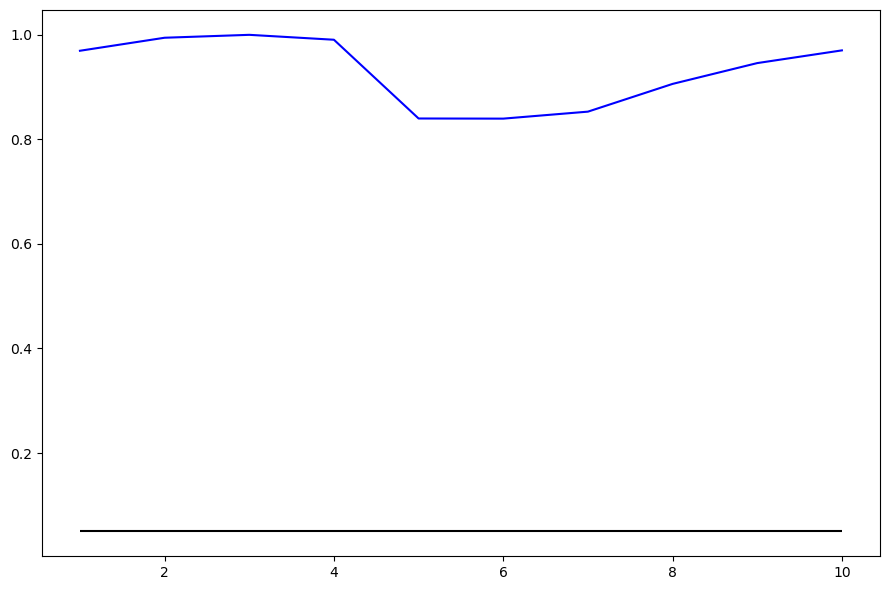

In [ ]:
residuals = model_fit.resid

ljung_box_test(residuals, False, None)

#### Forecasting 

In [ ]:
def rolling_predictions(df_diff: pd.DataFrame, last_train_value: np.array, train_len: int, horizon: int, window: int, method: str) -> list:
    
    TOTAL_LEN = train_len + horizon
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, TOTAL_LEN, window):
            mean = np.mean(df_diff[:i].values)
            pred_mean.extend(mean for _ in range(window))
            
        pred_mean = np.concatenate((last_train_value, pred_mean))
        pred_mean = pred_mean.cumsum()
        
        return pred_mean[:100]

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, TOTAL_LEN, window):
            last_value = df_diff[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        pred_last_value = np.concatenate((last_train_value, pred_last_value))
        pred_last_value = pred_last_value.cumsum()
        
        return pred_last_value[:100]
    
    if method == 'ARMA':
        pred_ARMA = []
        
        for i in range(train_len, TOTAL_LEN, window):
            model = SARIMAX(df_diff[:i], order=(1,0,1))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
            
        pred_ARMA = np.concatenate((last_train_value, pred_ARMA))
        pred_ARMA = pred_ARMA.cumsum()
            
        return pred_ARMA[:100]

In [ ]:
pred_df = df[-100:].copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
LAST_TRAIN_VALUE = df.iloc[899].values

windows = [1, 2, 5, 10]

for window in windows:
    pred_mean = rolling_predictions(df_diff, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'mean')
    pred_last = rolling_predictions(df_diff, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'last')
    pred_ARMA = rolling_predictions(df_diff, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'ARMA')

    pred_df[f'pred_mean_{window}'] = pred_mean
    pred_df[f'pred_last_{window}'] = pred_last
    pred_df[f'pred_ARMA_{window}'] = pred_ARMA

pred_df.head()

value  pred_mean_1  pred_last_1  pred_ARMA_1  pred_mean_2  \
900  1003.730386  1002.863325  1002.863325  1002.863325  1002.863325   
901  1004.262068  1002.866510  1004.310236  1003.328221  1002.866510   
902  1004.080917  1002.870654  1005.177297  1003.934114  1002.869695   
903  1003.208391  1002.875385  1005.708980  1004.134752  1002.874425   
904  1002.816720  1002.879909  1005.527829  1003.847927  1002.879155   

     pred_last_2  pred_ARMA_2  pred_mean_5  pred_last_5  pred_ARMA_5  \
900  1002.863325  1002.863325  1002.863325  1002.863325  1002.863325   
901  1004.310236  1003.328221  1002.866510  1004.310236  1003.328221   
902  1005.757148  1003.537886  1002.869695  1005.757148  1003.537886   
903  1006.288831  1003.738525  1002.872880  1007.204060  1003.632444   
904  1006.820514  1003.829245  1002.876065  1008.650972  1003.675089   

     pred_mean_10  pred_last_10  pred_ARMA_10  
900   1002.863325   1002.863325   1002.863325  
901   1002.866510   1004.310236   1003.328221  
902   1002.869695   1005.757148   1003.537886  
903   1002.872880   1007.204060   1003.632444  
904   1002.876065   1008.650972   1003.675089

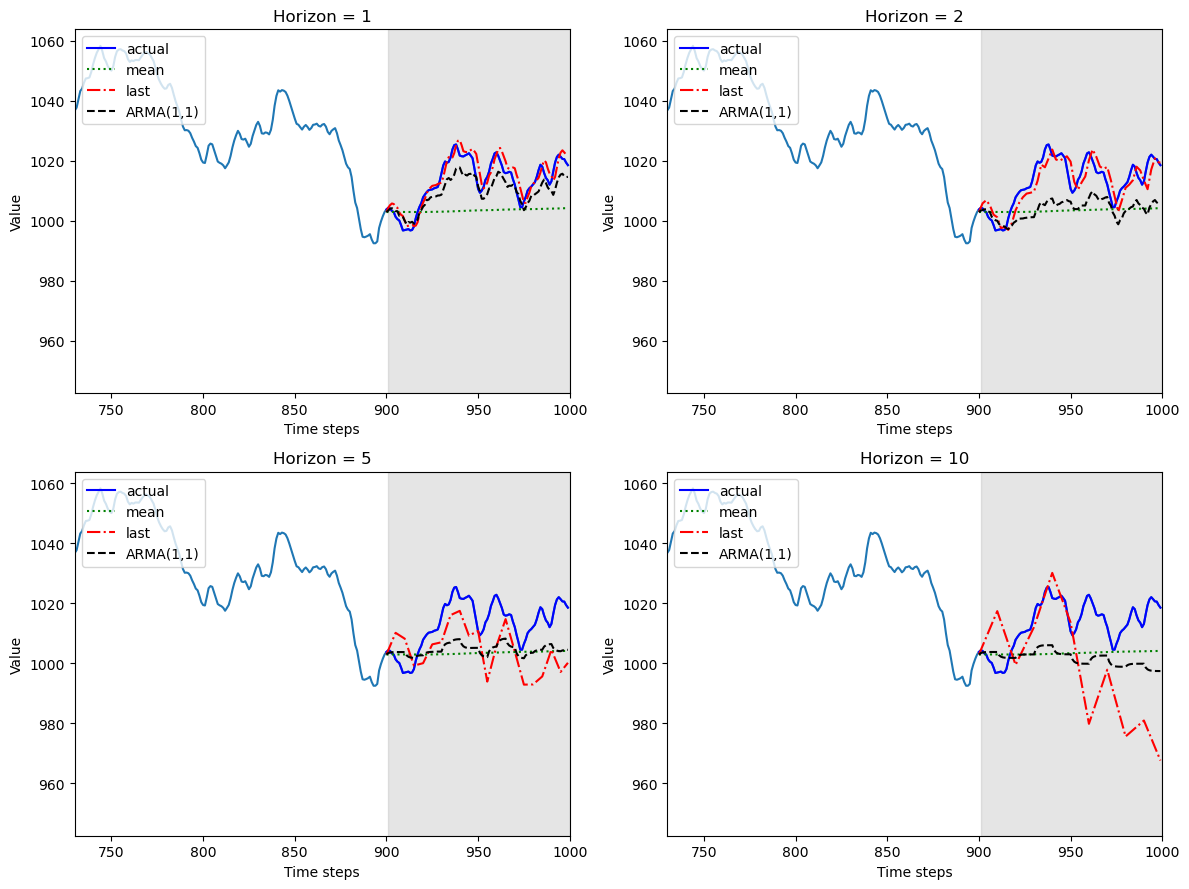

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):
    
    ax.plot(df['value'])
    ax.plot(pred_df['value'], 'b-', label='actual')
    ax.plot(pred_df[f'pred_mean_{windows[i]}'], 'g:', label='mean')
    ax.plot(pred_df[f'pred_last_{windows[i]}'], 'r-.', label='last')
    ax.plot(pred_df[f'pred_ARMA_{windows[i]}'], 'k--', label='ARMA(1,1)')
    
    ax.legend(loc=2)
    ax.set_xlabel('Time steps')
    ax.set_ylabel('Value')
    ax.axvspan(901, 1000, color='#808080', alpha=0.2)
    ax.set_xlim(730, 1000)
    ax.set_title(f'Horizon = {windows[i]}')
    
plt.tight_layout()

In [ ]:
mae_mean_1 = mean_absolute_error(pred_df['value'], pred_df['pred_mean_1'])
mae_last_1 = mean_absolute_error(pred_df['value'], pred_df['pred_last_1'])
mae_ARMA_1 = mean_absolute_error(pred_df['value'], pred_df['pred_ARMA_1'])

mae_mean_2 = mean_absolute_error(pred_df['value'], pred_df['pred_mean_2'])
mae_last_2 = mean_absolute_error(pred_df['value'], pred_df['pred_last_2'])
mae_ARMA_2 = mean_absolute_error(pred_df['value'], pred_df['pred_ARMA_2'])

mae_mean_5 = mean_absolute_error(pred_df['value'], pred_df['pred_mean_5'])
mae_last_5 = mean_absolute_error(pred_df['value'], pred_df['pred_last_5'])
mae_ARMA_5 = mean_absolute_error(pred_df['value'], pred_df['pred_ARMA_5'])

mae_mean_10 = mean_absolute_error(pred_df['value'], pred_df['pred_mean_10'])
mae_last_10 = mean_absolute_error(pred_df['value'], pred_df['pred_last_10'])
mae_ARMA_10 = mean_absolute_error(pred_df['value'], pred_df['pred_ARMA_10'])

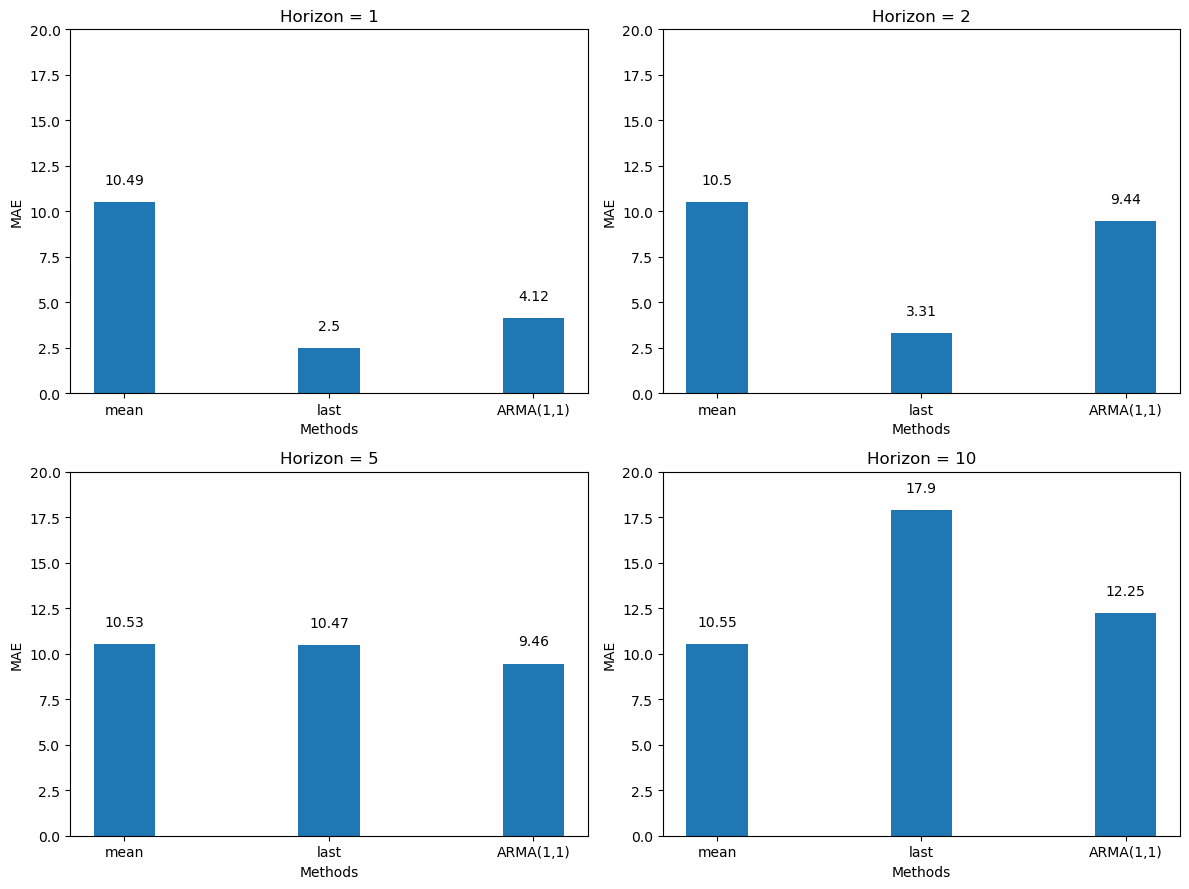

In [ ]:
maes_mean = [mae_mean_1, mae_mean_2, mae_mean_5, mae_mean_10]
maes_last = [mae_last_1, mae_last_2, mae_last_5, mae_last_10]
maes_ARMA = [mae_ARMA_1, mae_ARMA_2, mae_ARMA_5, mae_ARMA_10]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

x = ['mean', 'last', 'ARMA(1,1)']
width = 0.3

for i, ax in enumerate(axes.flatten()):
    
    y = [maes_mean[i], maes_last[i], maes_ARMA[i]]
    ax.bar(x, y, width)
    ax.set_xlabel('Methods')
    ax.set_ylabel('MAE')
    ax.set_ylim(0, 20)
    ax.set_title(f'Horizon = {windows[i]}')    
    
    for index, value in enumerate(y):
        ax.text(x=index, y=value+1, s=str(round(value, 2)), ha='center')

plt.tight_layout()